In [1]:
import pandas as pd

df = pd.read_excel("both db.xlsx", sheet_name="summer")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  744 non-null    object 
 1   PSSRa    744 non-null    float64
 2   PSSRb    744 non-null    float64
 3   RARSc    744 non-null    float64
 4   PSSRc    744 non-null    float64
 5   CARI     744 non-null    float64
 6   NDVI705  744 non-null    float64
 7   PSNDa    744 non-null    float64
 8   YI       744 non-null    float64
 9   RES      744 non-null    float64
 10  PRI      744 non-null    float64
 11  NDVIa    744 non-null    float64
 12  NDVIb    744 non-null    float64
dtypes: float64(12), object(1)
memory usage: 75.7+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI,NDVI705,PSNDa,YI,RES,PRI,NDVIa,NDVIb
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,6.931892,6.150310,5.377358,5.383945,1.407607,0.438281,0.719916,-0.007455,0.400472,0.039079,0.714388,0.711895
std,2.753838,2.433866,2.057148,2.055339,0.654347,0.092965,0.087538,0.003932,0.093192,0.015559,0.087137,0.087786
min,2.379702,2.342322,1.934046,1.913839,0.352701,0.167501,0.408232,-0.020068,0.214522,-0.003652,0.401591,0.392700
25%,5.118320,4.457897,3.972182,3.977449,0.957658,0.368625,0.673113,-0.009909,0.319985,0.028149,0.667548,0.665328
50%,6.140668,5.538846,4.870609,4.900425,1.217905,0.449190,0.719914,-0.007460,0.386674,0.038160,0.715838,0.713396
75%,7.936846,7.143334,6.277664,6.297254,1.772151,0.516768,0.776207,-0.005626,0.476209,0.049077,0.769067,0.767464
max,15.674217,15.186808,12.468778,12.375205,3.813228,0.638737,0.880054,0.011261,0.621575,0.080099,0.875159,0.874288


Free attempt - 5 indices - straightforward

Accuracy: 0.6778523489932886


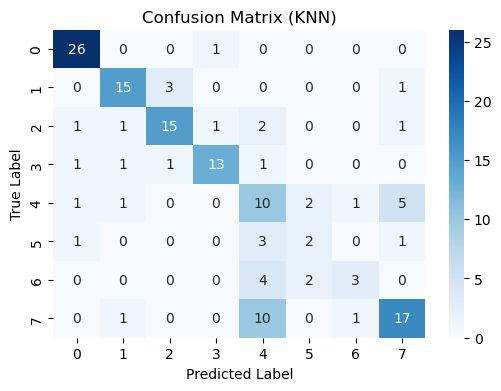

Confusion Matrix (Percentage):
                CHEAL      CYPES      ECHCG      GASCI      Maize    Morello  \
CHEAL       96.296296   0.000000   0.000000   3.703704   0.000000   0.000000   
CYPES        0.000000  78.947368  15.789474   0.000000   0.000000   0.000000   
ECHCG        4.761905   4.761905  71.428571   4.761905   9.523810   0.000000   
GASCI        5.882353   5.882353   5.882353  76.470588   5.882353   0.000000   
Maize        5.000000   5.000000   0.000000   0.000000  50.000000  10.000000   
Morello     14.285714   0.000000   0.000000   0.000000  42.857143  28.571429   
Pignoletto   0.000000   0.000000   0.000000   0.000000  44.444444  22.222222   
SORHA        0.000000   3.448276   0.000000   0.000000  34.482759   0.000000   

            Pignoletto      SORHA  
CHEAL         0.000000   0.000000  
CYPES         0.000000   5.263158  
ECHCG         0.000000   4.761905  
GASCI         0.000000   0.000000  
Maize         5.000000  25.000000  
Morello       0.000000  14.28571

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'species' is the target column.
# Here, X will be the features (all columns except 'species') and y will be the target.
X = df.drop("species", axis=1)
y = df["species"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the KNN classifier (here using 5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict and compute the confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')
plt.show()

# Calculate the confusion matrix in percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print("Confusion Matrix (Percentage):")
print(cm_df)

# Note: KNN does not provide feature importances directly.
print("KNN does not provide feature importances directly, as it is a distance-based method.")


In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Example lists of species for each category
monocot_species = ["CYPES","ECHCG","Maize","SORHA","Pignoletto","Morello"]  # example species
dicot_species   = ["CHEAL","GASCI"]
weed_species    = ["CYPES","ECHCG","SORHA","CHEAL","GASCI"]  # example of some species labeled as weeds
crop_species    = ["Maize","Pignoletto","Morello"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["CYPES","ECHCG","SORHA"]
monocot_crop_species = [ "Maize","Pignoletto","Morello"]
dicot_weed_species   = ["CHEAL","GASCI"]

# Assume df is your main DataFrame with features and a 'species' column.
# Create first-level category: 'monocot' vs 'dicot'
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category: 'weed' vs 'crop'
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and targets
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]  # Level 1 target

# ---------------------------
# Level 1: Monocot vs Dicot Classification using KNN
# ---------------------------
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
clf_cat1 = KNeighborsClassifier(n_neighbors=5)
clf_cat1.fit(X_train_cat1, y_train_cat1)
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# ---------------------------
# Level 2: Weed vs Crop Classification for each category
# For monocots:
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(
    X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot
)
clf_cat2_monocot = KNeighborsClassifier(n_neighbors=5)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# For dicots:
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]
X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(
    X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot
)
clf_cat2_dicot = KNeighborsClassifier(n_neighbors=5)
clf_cat2_dicot.fit(X_train_di, y_train_di)
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# ---------------------------
# Level 3: Species-Level Classification
# Train separate models for each final group:
# Monocot-Weed model
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]
clf_mono_weed = KNeighborsClassifier(n_neighbors=5)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]
clf_mono_crop = KNeighborsClassifier(n_neighbors=5)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]
clf_dicot_weed = KNeighborsClassifier(n_neighbors=5)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model (if applicable)
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

# Check if dicot_crop data exists
if len(X_dicot_crop) > 0:
    clf_dicot_crop = KNeighborsClassifier(n_neighbors=5)
    clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)
else:
    clf_dicot_crop = None  # Set to None if no data available


# ---------------------------
# Final Species-Level Prediction on Test Samples
# For each test sample, based on the predicted category1 and category2, choose the corresponding species-level classifier.
final_species_preds = []
for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            if clf_dicot_crop is None:
                # Handle the case where there's no dicot crop classifier
                sp_pred = "unknown"  # or handle this case as needed
            else:
                sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

# Compute confusion matrix in percentages:
cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print("Confusion Matrix (Percentage):")
print(cm_df)


Final Species-Level Accuracy: 0.7651006711409396
Confusion Matrix (Percentage):
                CHEAL      CYPES      ECHCG      GASCI      Maize    Morello  \
CHEAL       96.296296   0.000000   0.000000   3.703704   0.000000   0.000000   
CYPES        0.000000  90.476190   9.523810   0.000000   0.000000   0.000000   
ECHCG        0.000000   0.000000  90.476190   0.000000   4.761905   0.000000   
GASCI       11.764706   0.000000   5.882353  76.470588   5.882353   0.000000   
Maize        0.000000   0.000000   0.000000   0.000000  81.818182   9.090909   
Morello      0.000000   0.000000   0.000000   0.000000  44.444444  44.444444   
Pignoletto   0.000000   0.000000   0.000000   0.000000  57.142857  21.428571   
SORHA        0.000000   6.896552  13.793103   0.000000   3.448276   0.000000   

            Pignoletto      SORHA  
CHEAL         0.000000   0.000000  
CYPES         0.000000   0.000000  
ECHCG         0.000000   4.761905  
GASCI         0.000000   0.000000  
Maize         0.000